In [24]:
from astropy.io import fits, ascii
from astropy.table import Table, Column, hstack
import pdb, glob, random
import numpy as np
import rafias_lib as rl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Radius testing for  4 tests

### Sub320

In [25]:
files_sub1 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB-60*_1_481_SE_*/*.slp.fits'))
len(files_sub1)

306

In [26]:
files_sub2 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB-60*_1_489_SE_*/*.slp.fits'))[:306]
len(files_sub2)

306

In [27]:
centers_sub1 = rl.gen_center_g2d(166,160,5,400,2,2,0,files_sub1)

In [28]:
centers_sub2 = rl.gen_center_g2d(162,156,5,500,2,2,0,files_sub2)

In [30]:
rt_sub = rl.radius_testing(centers_sub1[1], centers_sub1[2], files_sub1, centers_sub2[1], centers_sub2[2], files_sub2,
                           30, 130, 10, 50, 150, 10, 70, 170, 10) 

The minimum Standard deviation is 0.000499
It occurs for the radius r = 70.000000
It occurs for the inner radius r_in = 80.000000
It occurs for the outer radius r_out = 90.000000


In [31]:
ascii.write(rt_sub, 'rt_sub.csv', overwrite = True)

### Sub640

In [32]:
files_sub6401 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB640-60*_1_481_SE_*/*.slp.fits'))
len(files_sub6401)

60

In [33]:
files_sub6402 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB640-60*_1_489_SE_*/*.slp.fits'))
len(files_sub6402)

60

In [34]:
centers_sub6401 = rl.gen_center_g2d(326,320,5,400,2,2,0,files_sub6401)

In [35]:
centers_sub6402 = rl.gen_center_g2d(319,316,5,500,2,2,0,files_sub6402)

In [36]:
rt_sub640 = rl.radius_testing(centers_sub6401[1], centers_sub6401[2], files_sub6401, centers_sub6402[1], 
                              centers_sub6402[2], files_sub6402, 30, 130, 10, 50, 150, 10, 70, 170, 10)  

The minimum Standard deviation is 0.001045
It occurs for the radius r = 40.000000
It occurs for the inner radius r_in = 50.000000
It occurs for the outer radius r_out = 70.000000


In [37]:
ascii.write(rt_sub640, 'rt_sub640.csv', overwrite = True)

### Full

In [38]:
files_full1 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'
                              'NRCN821WLP8FULL1-*_1_481_SE_*/*.red.fits'))
len(files_full1)

225

In [39]:
files_full2 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'
                              'NRCN821WLP8FULL1-*_1_489_SE_*/*.red.fits'))
len(files_full2)

225

In [40]:
centers_full1 = rl.gen_center_g2d(1405,1036,5,400,4,4,0, files_full1, red = True)

In [41]:
centers_full2 = rl.gen_center_g2d(828,821,5,600,4,4,0, files_full2, red = True)

In [42]:
rt_full = rl.radius_testing(centers_full1[1], centers_full1[2], files_full1, centers_full2[1], centers_full2[2], 
                            files_full2, 30, 130, 10, 50, 150, 10, 70, 170, 10, Red = True) 

The minimum Standard deviation is 0.001292
It occurs for the radius r = 60.000000
It occurs for the inner radius r_in = 70.000000
It occurs for the outer radius r_out = 80.000000


In [43]:
ascii.write(rt_full, 'rt_full.csv', overwrite = True)

### Clr

In [44]:
files_clr1 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821CLRSUB1*_481_SE_2016-*/*.slp.fits'))
len(files_clr1)

100

In [45]:
files_clr2 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821CLRSUB1*_489_SE_2016-*/*.slp.fits'))
len(files_clr2)

100

In [46]:
centers_clr1 = rl.gen_center_g2d(164,161,5,3500,2,2,0, files_clr1)

In [47]:
centers_clr2 = rl.gen_center_g2d(160,155,5,4500,2,2,0, files_clr2)

In [48]:
rt_clr = rl.radius_testing(centers_clr1[1], centers_clr1[2], files_clr1, centers_clr2[1], centers_clr2[2], files_clr2,
                           2, 4, 0.2, 5, 7, 0.2, 6, 9, 0.2) 

The minimum Standard deviation is 0.002348
It occurs for the radius r = 2.600000
It occurs for the inner radius r_in = 6.400000
It occurs for the outer radius r_out = 7.000000


In [49]:
ascii.write(rt_clr, 'rt_clr(fg).csv', overwrite = True)

# Re-parametrization

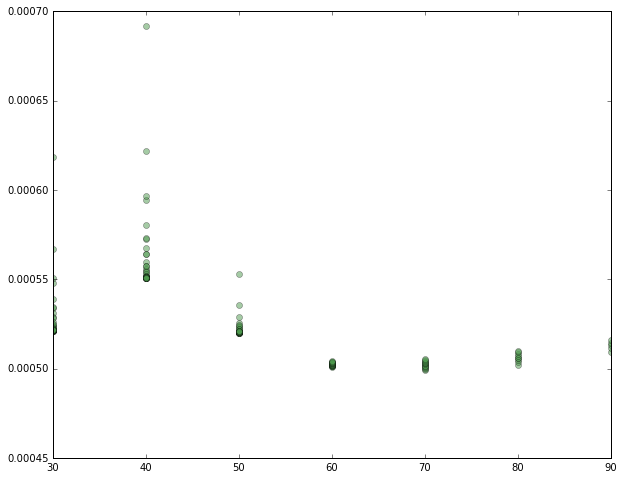

In [28]:
sub = ascii.read('rt_sub.csv')
plt.plot(sub['r_source'], sub['norm_stdev'], 'o', color = (0.3, 0.6, 0.3, 0.5))

In [37]:
np.where((sub['rIn - r'] == 20) & (sub['rOut - rIn'] == 20))[0]

array([  0,  42,  76, 102, 121, 134, 142])

In [75]:
def parabola_plot(data):
    inner_diff = data['rIn - r']
    outer_diff = data['rOut - rIn']
    shade_factor = 0.6
    for i, (diff_in, diff_out) in enumerate(zip(inner_diff, outer_diff)):
        ind = np.where((inner_diff == diff_in) & (outer_diff == diff_out))[0]
        r, g, b, a = (i+1)/350, (i+1)/400, (i+1)/250, (i+1)/150.
        plt.plot(data['r_source'][ind], data['norm_stdev'][ind], 'o-', color = (r,g,b,a), 
                 label = "in = %i, out = %i" % (diff_in, diff_out))
    plt.legend(loc = 'best', ncol = 4, bbox_to_anchor = (1,1))

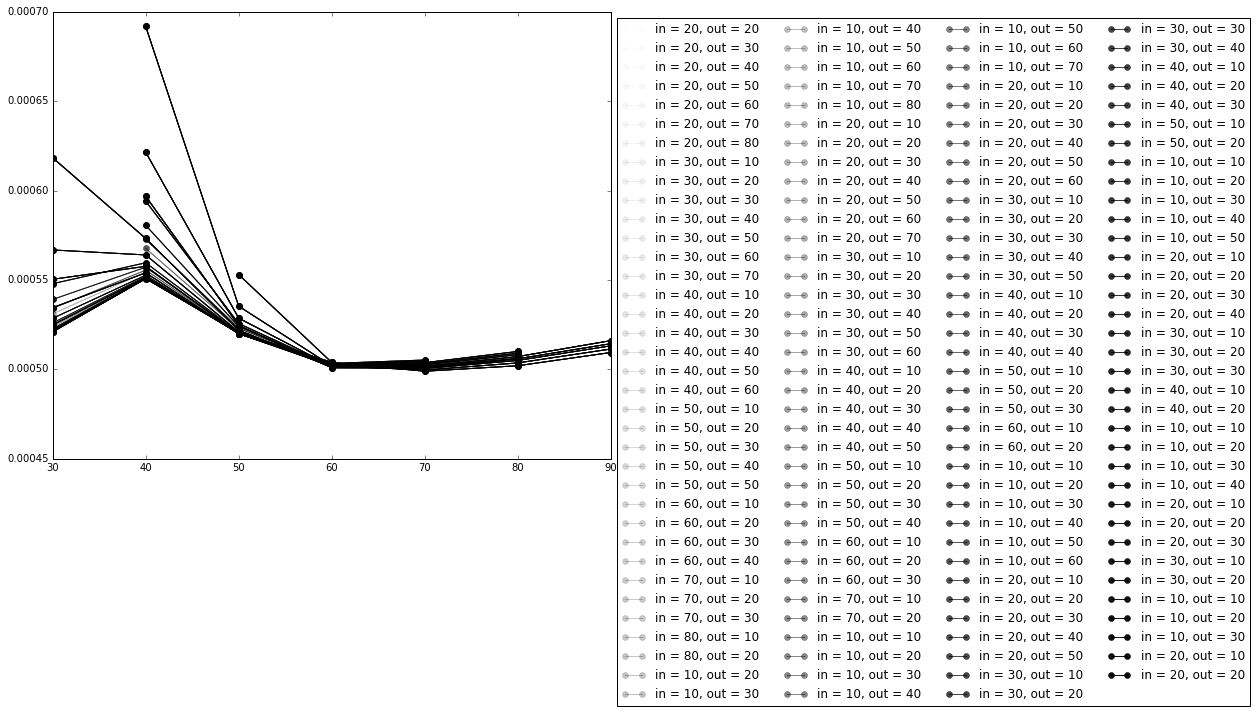

In [76]:
parabola_plot(sub)

# Old stuff

In [ ]:
#Importing a1 files
hdu_filenames_a11 = glob.glob('/data/External/ISIMCV3_unzipped/NRCN821/fitsfilesonly/raw_separated_MMM/\
                    NRCN821WLP8SUB640-6012195832_1_481_SE_2016-01-12T20h57m57/*.slp.fits')
len(hdu_filenames_a11)

In [ ]:
reload(rl)

In [ ]:
centers_a11 = rl.gen_center_g2d(326, 320, 5, 450, 2, 2, 0, hdu_filenames_a11)

In [ ]:
centers_a11

In [ ]:
r_src_low = 80
r_src_up = 100
inc = 5

In [ ]:
stdev_table = rl.radius_testing(centers_a11[0], r_src_low, r_src_up, inc, r_src_low + inc, r_src_up + (4*inc), inc,
                                r_src_low + (2*inc), r_src_up + (5*inc), inc, hdu_filenames_a11)
stdev_table

In [ ]:
for r_in in range(80, 180, 10):
    for r_out in range(90, 190, 10):
        index = (stdev_table['r_in']==r_in) & (stdev_table['r_out']==r_out)
        plt.plot(stdev_table['r_source'][index], stdev_table['norm_stdev'][index], label = 'r_in = %f , r_out = %f' % (r_in, r_out))
        plt.xlabel('R_source [Pixels]')
        plt.ylabel('Standard Deviation [DN/S]')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

In [ ]:
for r_in in range(80, 180, 10):
    indices = stdev_table['r_in'] == r_in
    plt.plot(stdev_table['r_source'][indices], ((stdev_table['St_Dev'][indices])/(stdev_table['Median_Res_Flux'][indices])), '.-')

In [ ]:
### Radius testing for red data

In [ ]:
#Importing a1 files
hdu_filenames_red = glob.glob('/data/External/ISIMCV3_unzipped/NRCN821/fitsfilesonly/reduced_separated_MMM/'+
                              'NRCN821WLP8FULLQ-6013001651_1_481_SE_2016-01-13T01h03m43/*.red.fits')
len(hdu_filenames_red)

In [ ]:
centers_red = rl.gen_center_g2d(1405, 1036, 5, 400, 4, 4, 0, hdu_filenames_red, red_files = True)
centers_red

In [ ]:
stdev_table = rl.radius_testing(centers_red[0], 30, 130, 10, 50, 150, 10, 70, 170, 10, hdu_filenames_red, 
                                red_files = True)
stdev_table

In [ ]:
for r_in in range(50, 150, 10):
    for r_out in range(70, 170, 10):
        index = (stdev_table['r_in']==r_in) & (stdev_table['r_out']==r_out)
        plt.plot(stdev_table['r_source'][index], stdev_table['norm_stdev'][index], label = 'r_in = %f , r_out = %f' % (r_in, r_out))
        plt.xlabel('R_source [Pixels]')
        plt.ylabel('Standard Deviation [DN/S]')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

## Re-parametrizing radius testing code

In [ ]:
reload(rl)
stdev_table = rl.radius_testing(centers_red[0], 30, 130, 10, 50, 150, 10, 70, 170, 10, hdu_filenames_red, 
                                red_files = True)
stdev_table

In [ ]:
diff_in = stdev_table['rIn - r']
diff_out = stdev_table['rOut - rIn']
for dIn in diff_in:
    for dOut in diff_out:
        index = (diff_in==dIn) & (diff_out==dOut)
        plt.plot(stdev_table['r_source'][index], stdev_table['norm_stdev'][index], 
                 label = 'diff_in = %f , diff_out = %f' % (dIn, dOut))
        plt.xlabel('R_source [Pixels]')
        plt.ylabel('Standard Deviation [DN/S]')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
#         pdb.set_trace()